# PROJECT 1: AIR QUALITY IN HANOI
# Exploratory Data Analysis - Impact of Weather Conditions on Air Quality
By Nam Aaron Nguyen
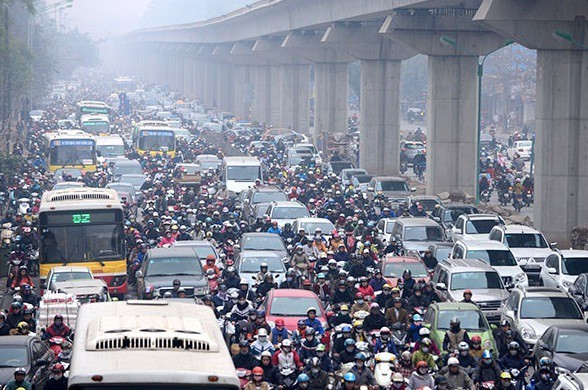

# **Introduction**

In this notebook, I will delve deeper into the dataframe, analyzing the historical data and discovering the impact of weather conditions on air quality of Hanoi.

## Dataset Description

The dataset consists of hourly data spanning 8785 rows and 18 columns. It covers the period from **March 8th, 2023, 00:00:00** to **March 8th, 2024, 00:00:00**. There is no missing data point within the dataframe.

## Column Definition

**Air Quality columns**
- AQI: Air quality index
- CO: Carbon Monoxide (mg/$m^{3}$)
- NO2: Nitrogen Dioxide (ug/$m^{3}$)
- O3: Ozone (ug/$m^{3}$)
- PM10: Particulate Matter 10 (ug/$m^{3}$)
- PM25: Particulate Matter 2.5 (ug/$m^{3}$)
- SO2: Sulfur Dioxide (ug/$m^{3}$)

**Weather columns**
- Clouds: Cloud Coverage (%)
- Precipitation: Precipitation (mm)
- Pressure: Atmospheric Pressure (hPa)
- Relative Humidity: Humidity (%)
- Temperature: Temperature (°C)
- UV Index: Ultraviolet Index
- Wind Speed: Wind Speed (m/s)

# I. Import libraries

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px

%matplotlib inline


# II. Import data

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('hanoi-aqi-weather-data.csv')  # Replace 'file.csv' with the path to your CSV file

# Convert 'Local Time' column to datetime object
df['Local Time'] = pd.to_datetime(df['Local Time'])

# Set 'Local Time' column as index
df.set_index('Local Time', inplace=True)

# Display the DataFrame
df  # Use df.head() to display the first few rows of the DataFrame

,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,,,,,
2023-03-08 00:00:00,2023-03-07T17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,131,170.6,29.3,53.3,58.8,47.00,67.3,91,0.0,1016,86,21.2,0.0,2.00
2023-03-08 01:00:00,2023-03-07T18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,158.7,25.0,54.0,56.3,45.00,65.0,100,0.0,1016,89,21.1,0.0,2.00
2023-03-08 02:00:00,2023-03-07T19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,150.2,21.7,55.0,52.5,42.00,65.7,100,0.0,1016,90,20.9,0.0,1.66
2023-03-08 03:00:00,2023-03-07T20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,141.6,18.3,56.0,56.3,45.00,66.3,100,0.0,1016,91,20.7,0.0,1.33
2023-03-08 04:00:00,2023-03-07T21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,133.1,15.0,57.0,52.5,42.00,67.0,100,0.0,1015,92,20.5,0.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07 20:00:00,2024-03-07T13:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,193,6738.4,36.7,21.4,139.3,87.86,12.0,100,0.0,1014,71,21.5,0.0,1.00
2024-03-07 21:00:00,2024-03-07T14:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,173,6693.2,29.3,19.5,140.6,73.00,6.0,100,0.0,1015,75,21.1,0.0,1.00
2024-03-07 22:00:00,2024-03-07T15:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,241,504.0,108.0,18.4,167.0,124.00,116.0,100,0.0,1016,80,20.6,0.0,1.00


# III. Exploratory Data Analysis

Exploratory data analysis (EDA) will be used in this section to examine the data in order to find patterns, identify anomalies, test hypotheses, and verify presumptions with the aid of summary statistics and graphical representations.

For the past 45 years, the Air Quality Index (AQI), developed by the United States Environmental Protection Agency (USEPA), has been offering vital information to the public about the state of air pollution. The Air Quality Index is based on measurement of Carbon Monoxide (CO), Nitrogen Dioxide (NO2), Ozone (O3), particulate matter (PM2.5 and PM10), Sulfur Dioxide (SO2). 

PM2.5, denoting particulate matter with a diameter of 2.5 micrometers or less, represents the primary health hazard and is frequently utilized as a criterion in regulatory air quality guidelines.

According to [2019 World Air Quality Report by IQAir](https://www.iqair.com/world-most-polluted-cities/world-air-quality-report-2019-en.pdf), the levels of PM2.5 have been grouped to determine the air quality status as followed:
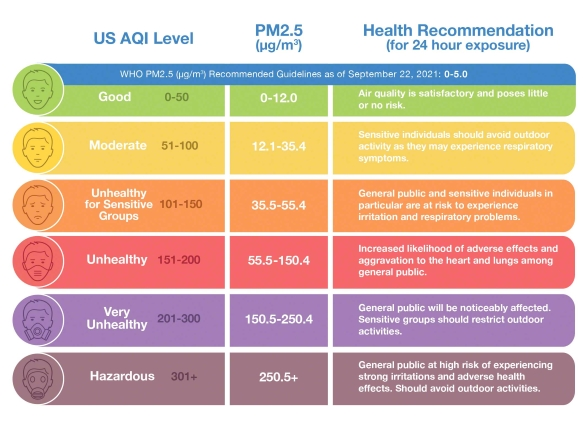

## 3.1. Summary Statistics 

In [3]:
df.describe()

,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
count,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000
mean,117.625612,436.146238,27.913887,62.308310,62.310939,49.401244,75.815822,72.992032,0.274132,1010.006602,78.043142,25.281172,1.332863,1.606777
std,53.380563,985.528684,34.063995,45.703768,57.237488,47.699812,45.197389,28.450636,1.029955,7.432832,15.373435,5.649272,1.975192,0.781160
min,21.000000,9.000000,2.000000,0.000000,1.300000,1.000000,0.000000,0.000000,0.000000,994.000000,17.000000,8.600000,0.000000,0.000000
25%,78.000000,124.700000,11.000000,28.100000,31.300000,24.670000,44.000000,58.000000,0.000000,1004.000000,68.000000,21.600000,0.000000,1.000000
50%,104.000000,169.000000,16.700000,52.000000,46.300000,36.000000,70.300000,80.000000,0.000000,1009.000000,82.000000,26.100000,0.600000,1.600000
75%,151.000000,269.200000,28.000000,85.000000,70.000000,55.000000,103.000000,100.000000,0.000000,1016.000000,91.000000,29.200000,2.000000,2.000000
max,500.000000,15956.200000,378.000000,262.000000,604.000000,446.000000,368.000000,100.000000,22.750000,1033.000000,100.000000,40.000000,12.100000,5.200000


*On average, Hanoi registers an AQI level of 117.63, placing it within the "Unhealthy for Sensitive Groups" category. However, there have been periods when the AQI spiked to its maximum value of 500, reaching the "Hazardous" level. Similarly, the PM2.5 index averages at 49.4 µg/m³, also reflecting "Unhealthy for Sensitive Groups" conditions. For the precipitation, without information on the total rainfall, it's impossible to say for sure if Hanoi qualifies as one of the wettest cities. Hanoi's atmospheric pressure mean is approximately 1010 hPa, which is nearly stantdard pressure (1013 hPa). With a mean humidity of 78.05%, Hanoi ranks among the most humid cities in Asia. Furthermore, the average temperature of 25.3℃ suggests that the city experiences consistently warm conditions throughout the year.*

## 3.2. Air Quality Index (AQI)

### 3.2.1. Hanoi hourly AQI throughout the year

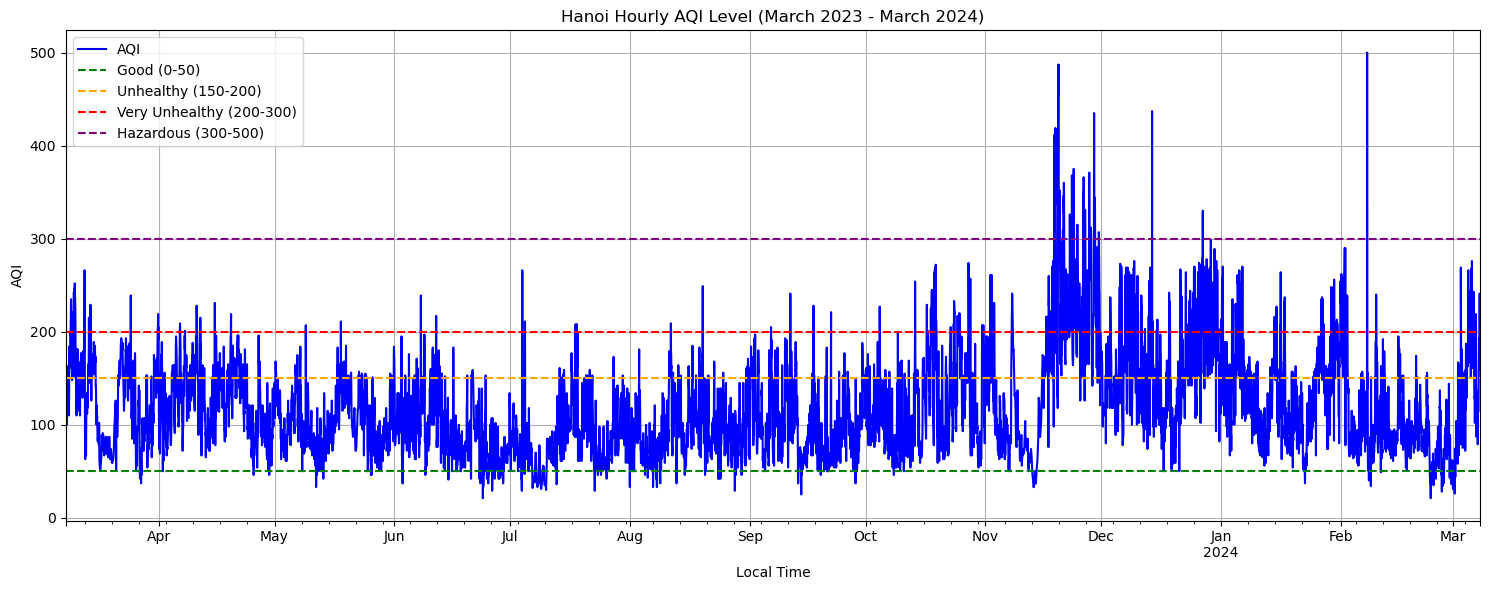

Time with the highest AQI level: (Timestamp('2024-02-07 19:00:00'), 500)


In [4]:
# Plot the AQI time series line plot
plt.figure(figsize=(15, 6))
df['AQI'].plot(kind='line', color='b')

# Add labels and title
plt.xlabel('Local Time')
plt.ylabel('AQI')
plt.title('Hanoi Hourly AQI Level (March 2023 - March 2024)')
# Add horizontal lines for unhealthy levels
plt.axhline(y=50, color='green', linestyle='--', label='Good (0-50)')
plt.axhline(y=150, color='orange', linestyle='--', label='Unhealthy (150-200)')
plt.axhline(y=200, color='red', linestyle='--', label='Very Unhealthy (200-300)')
plt.axhline(y=300, color='purple', linestyle='--', label='Hazardous (300-500)')

# Show legend
plt.legend()
# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the time with the highest AQI level
highest_aqi_time = df['AQI'].idxmax(), df['AQI'].max()
print("Time with the highest AQI level:", highest_aqi_time)

*From the graph, it can be seen that Hanoi's AQI fluctuates mostly in the range of 50-150 (Moderate to Unhealthy for Sensitive Groups). The figure rarely stayed in the Good level area (0-50). The index also had a high frequency of exceeding Unhealthy benchmark. Espescially, the figure was in Hazardous level (>300) at different timestamps from November to mid February, reaching its highest point throughout the year at 7pm February 2nd, 2024.*

*In general, Hanoi faced critical air poluttion in the last year, which might servely impact its cityzens' health.*

### 3.2.2. Hanoi hourly AQI for months with hazardous AQI level

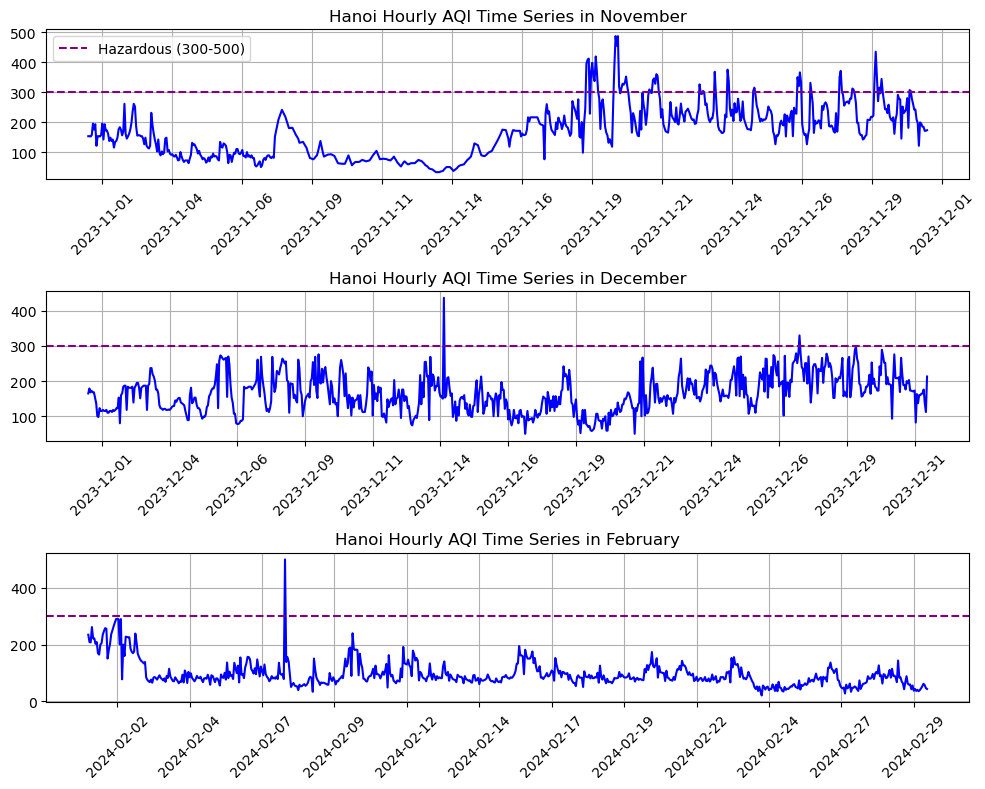

In [5]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Line Plot November AQI data
axs[0].plot(df['2023-11-01':'2023-11-30']["AQI"], color='b')
axs[0].set_title('Hanoi Hourly AQI Time Series in November')
axs[0].grid(True)
axs[0].axhline(y=300, color='purple', linestyle='--', label='Hazardous (300-500)')
axs[0].legend()

# Line Plot December AQI data
axs[1].plot(df['2023-12-01':'2023-12-31']["AQI"], color='b')
axs[1].set_title('Hanoi Hourly AQI Time Series in December')
axs[1].grid(True)
axs[1].axhline(y=300, color='purple', linestyle='--', label='Hazardous (300-500)')

# Line Plot February AQI data
axs[2].plot(df['2024-02-01':'2024-02-29']["AQI"], color='b')
axs[2].set_title('Hanoi Hourly AQI Time Series in February')
axs[2].grid(True)
axs[2].axhline(y=300, color='purple', linestyle='--', label='Hazardous (300-500)')

# Set x-axis ticks to display only 15 ticks
for ax in axs:
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))

# Rotate x-axis labels
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Show plot
plt.tight_layout()
plt.show()

*The months experiencing hours with hazardous AQI levels are November, December, and February. Upon reviewing the three graphs provided, it's evident that November witnessed a frequent occurrence of hazardous AQI levels, particularly during the latter half of the month. Conversely, December and February each saw only one day where the AQI reached hazardous levels.*

*The reasons for the November occurence were explained in ["Hanoi's air quality tumbles to harmful levels"](https://e.vnexpress.net/news/news/environment/hanoi-s-air-quality-tumbles-to-harmful-levels-4682193.html) by VnExpress. As per the article, the Vietnam Pollution Control Department noted that dry weather conditions in Hanoi led to widespread dust dispersion. Additionally, the burning of trash and leftover agricultural products was identified as contributing to increased pollution levels..*

## 3.3. Pm2.5 Level

According to [VnExpress](https://e.vnexpress.net/news/environment/hanoi-s-air-quality-dropping-over-large-scales-4719205.html), a research conducted by the Vietname Ministry of Natural Resources and the Environment indicated that the air pollution in Hanoi mainly came from PM2.5 dusts which serverely impacted people's health. Hence, we will have a further look on the Hanoi's PM2.5 index in last year.

### 3.3.1. Hanoi hourly Pm2.5 level throughout the year

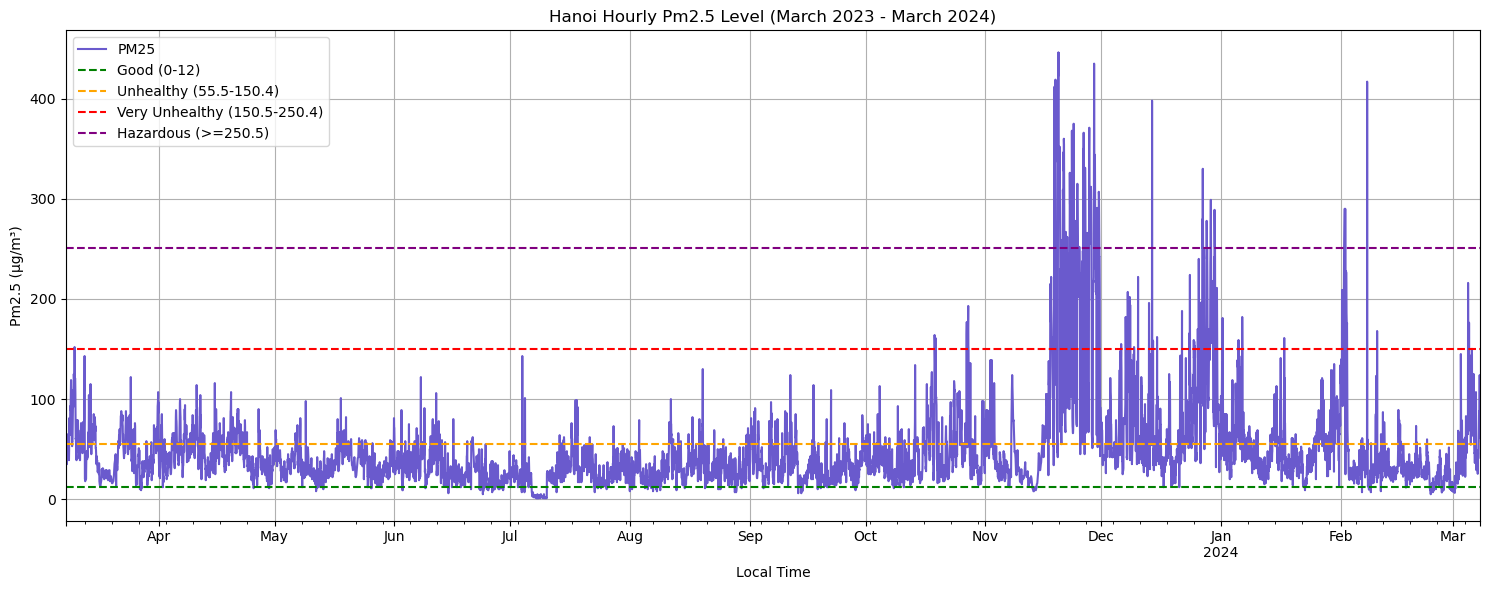

In [6]:
# Plot the AQI time series line plot
plt.figure(figsize=(15, 6))
df['PM25'].plot(kind='line', color='slateblue')

# Add labels and title
plt.xlabel('Local Time')
plt.ylabel('Pm2.5 (μg/m³)')
plt.title('Hanoi Hourly Pm2.5 Level (March 2023 - March 2024)')
# Add horizontal lines for unhealthy levels
plt.axhline(y=12, color='green', linestyle='--', label='Good (0-12)')
plt.axhline(y=55.5, color='orange', linestyle='--', label='Unhealthy (55.5-150.4)')
plt.axhline(y=150.5, color='red', linestyle='--', label='Very Unhealthy (150.5-250.4)')
plt.axhline(y=250.5, color='purple', linestyle='--', label='Hazardous (>=250.5)')
# Show legend
plt.legend()
# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


*According to the above graph, the fluctuation of Pm2.5 level seems to be in line with that of AQI level. Moreover, there were very few hours when the PM2.5 level is in 'Good' range.*

### 3.3.2. Hours with highest PM2.5 concentrations 

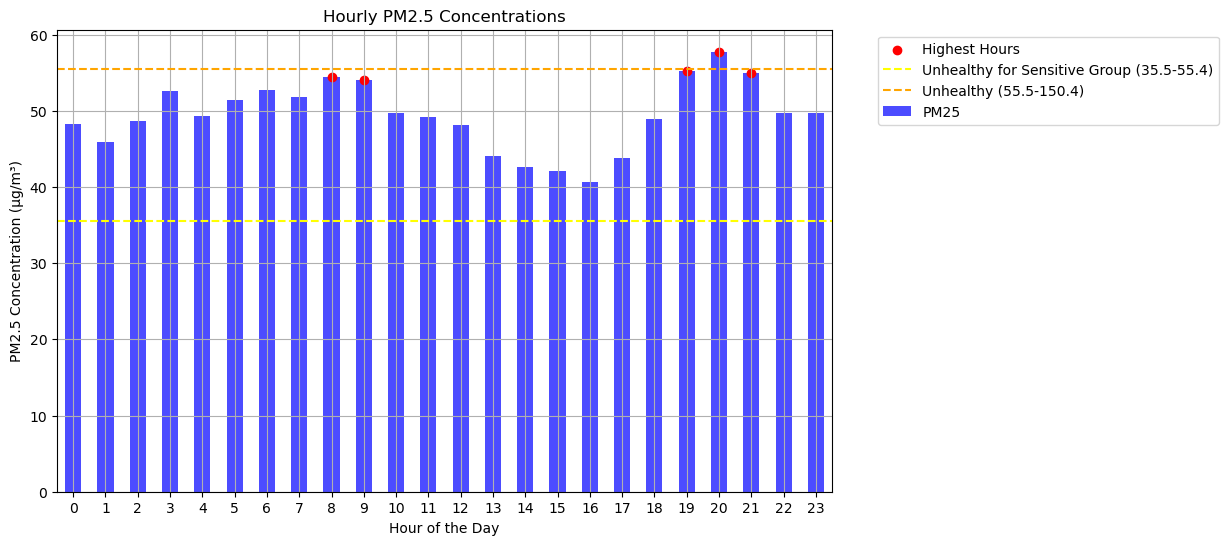

PM2.5 concentration at hour 8: 54.40
PM2.5 concentration at hour 9: 54.09
PM2.5 concentration at hour 19: 55.19
PM2.5 concentration at hour 20: 57.75
PM2.5 concentration at hour 21: 54.89


In [7]:
# Group data by hour and calculate mean PM2.5 concentration for each hour
hourly_pm25 = df['PM25'].groupby(df.index.hour).mean()

# Find hours with highest PM2.5 concentrations
highest_hours = hourly_pm25.nlargest(5)  # Change 5 to the number of highest hours you want to display

# Plot graph
plt.figure(figsize=(10, 6))
hourly_pm25.plot(kind='bar', color='blue', alpha=0.7)  # Plot hourly PM2.5 concentrations
plt.scatter(highest_hours.index, highest_hours.values, color='red', label='Highest Hours')  # Mark highest hours with red dots
plt.title('Hourly PM2.5 Concentrations')
plt.xlabel('Hour of the Day')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.axhline(y=35.5, color='yellow', linestyle='--', label='Unhealthy for Sensitive Group (35.5-55.4)')
plt.axhline(y=55.5, color='orange', linestyle='--', label='Unhealthy (55.5-150.4)')

# Move the legend to the upper left corner outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)

# Rotate x-axis labels vertically
plt.xticks(rotation='horizontal')

plt.show()

# List of specific hours
specific_hours = [8, 9, 19, 20, 21]

# Print PM2.5 concentrations at specific hours
for hour in specific_hours:
    pm25_concentration = hourly_pm25.loc[hour]
    print(f"PM2.5 concentration at hour {hour}: {pm25_concentration:.2f}")


*To identify the peak hours of PM2.5 concentration throughout the day, I first segmented the dataset by hour and computed the mean PM2.5 concentration for each hour. Based on this estimation, all hours have "Unhealthy for Sensitive Group" PM2.5 level and the peak PM2.5 levels were observed at 8 AM, 9 AM, 7 PM, 8 PM, and 9 PM. These hours coincide with peak traffic periods, suggesting that vehicular emissions significantly contribute to PM2.5 pollution. Notably, the PM2.5 concentration steadily accumulated over the course of the day, culminating in its highest peaks at 7 PM, 8 PM, and 9 PM, with levels reaching 55.19 μg/m³, 57.75 μg/m³, and 54.89 μg/m³ respectively.*

### 3.3.3. Average Pm2.5 per season

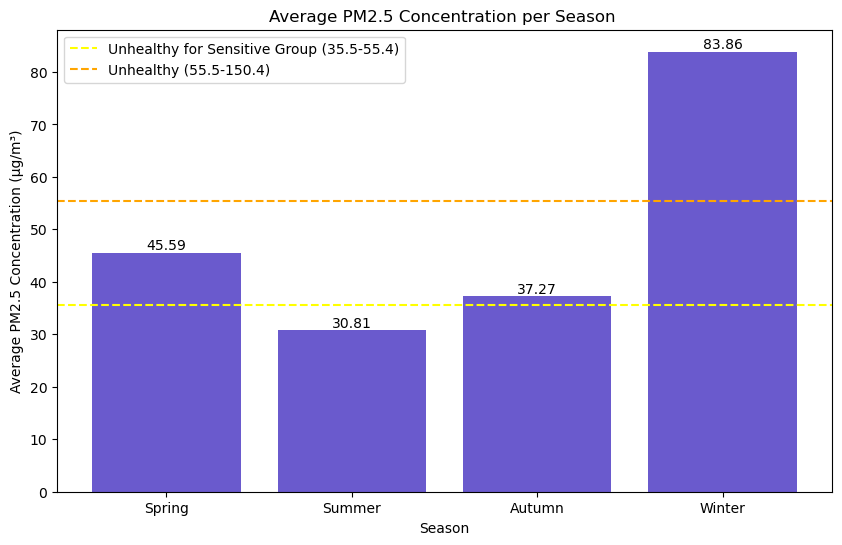

In [8]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average PM2.5 concentration for each season
seasonal_pm25 = {}
for season, months in seasons.items():
    seasonal_pm25[season] = df.loc[df.index.month.isin(months), 'PM25'].mean()

# Plot the average PM2.5 concentration for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_pm25.keys(), seasonal_pm25.values(), color='slateblue')
plt.title('Average PM2.5 Concentration per Season ')
plt.xlabel('Season')
plt.ylabel('Average PM2.5 Concentration (μg/m³)')
plt.axhline(y=35.5, color='yellow', linestyle='--', label='Unhealthy for Sensitive Group (35.5-55.4)')
plt.axhline(y=55.5, color='orange', linestyle='--', label='Unhealthy (55.5-150.4)')
plt.legend()

# Annotate the bars with the average PM2.5 concentration values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()

*To identify seasonal trends in PM2.5 level, I grouped the dataset by four seasons (Spring: February, March, April; Summer: May, June, July; Autumn: August, September, October; Winter: November, December, January) and computed the mean PM2.5 concentration for each season. Based on the estimation, winter observed the highest average PM2.5 concentration at 83.86 μg/m³ and it is the only season that has Pm2.5 level above Unhealthy benmarck. Spring and autumn figures are in Unhealthy for Sensitive Group range while summer average Pm2.5 level is in Moderate range.*

## 3.4. Precipitation

### 3.4.1. Hourly Precipitation Time Series

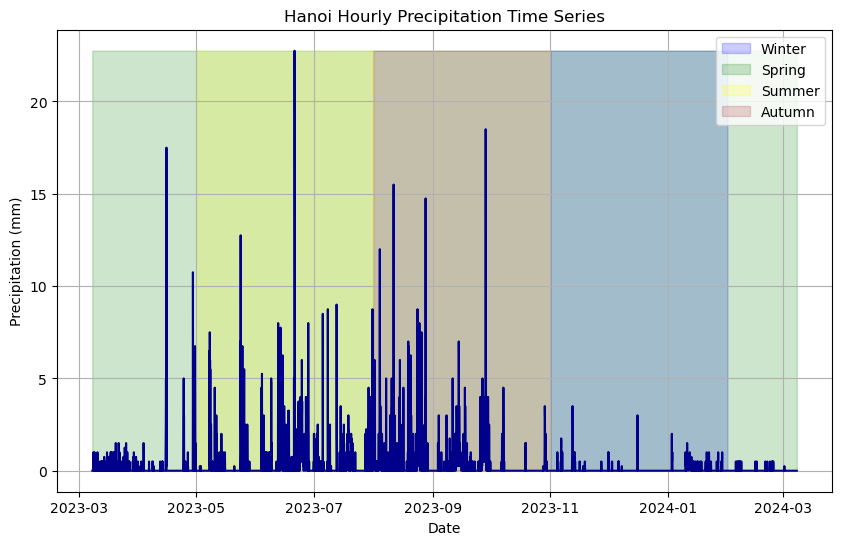

Annual Precipitation: 2408.25 mm


In [9]:
# Plot precipitation variable
plt.figure(figsize=(10, 6))

# Define seasons (assuming meteorological seasons: winter, spring, summer, autumn)
winter_months = [11, 12, 1]
spring_months = [2, 3, 4]
summer_months = [5, 6, 7]
autumn_months = [8, 9, 10]

# Plot entire precipitation time series
plt.plot(df.index, df['Precipitation'], color='darkblue')

# Shade winter season
plt.fill_between(df.index[df.index.month.isin(winter_months)], df['Precipitation'].min(), df['Precipitation'].max(), color='blue', alpha=0.2, label='Winter')

# Shade spring season
plt.fill_between(df.index[df.index.month.isin(spring_months)], df['Precipitation'].min(), df['Precipitation'].max(), color='green', alpha=0.2, label='Spring')

# Shade summer season
plt.fill_between(df.index[df.index.month.isin(summer_months)], df['Precipitation'].min(), df['Precipitation'].max(), color='yellow', alpha=0.2, label='Summer')

# Shade autumn season
plt.fill_between(df.index[df.index.month.isin(autumn_months)], df['Precipitation'].min(), df['Precipitation'].max(), color='brown', alpha=0.2, label='Autumn')

# Set title and labels
plt.title('Hanoi Hourly Precipitation Time Series')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Group data by year and calculate total precipitation for each year
annual_total_precipitation = df['Precipitation'].sum()

print("Annual Precipitation:", annual_total_precipitation, "mm")


### 3.4.2. Hourly Precipitation Time Series

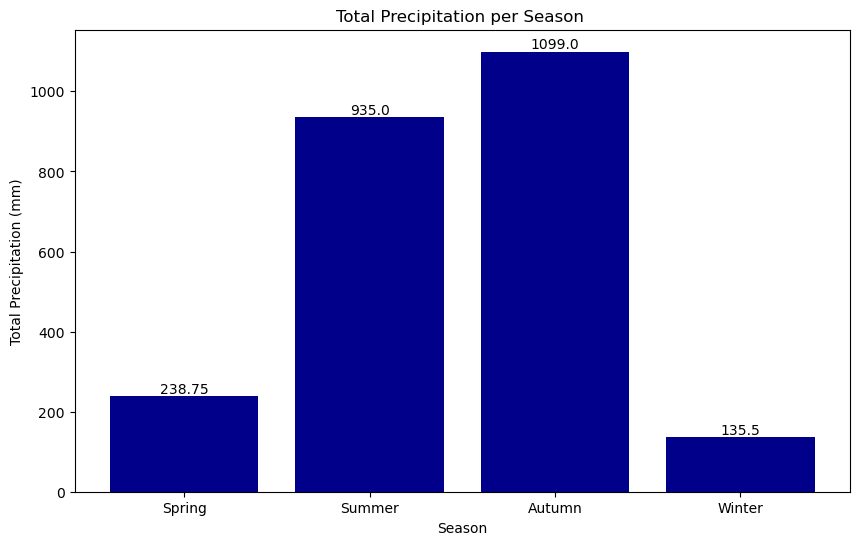

In [10]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate total precipitation for each season
seasonal_precipitation = {}
for season, months in seasons.items():
    seasonal_precipitation[season] = df.loc[df.index.month.isin(months), 'Precipitation'].sum()

# Plot the total precipitation for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_precipitation.keys(), seasonal_precipitation.values(), color='darkblue')
plt.title('Total Precipitation per Season ')
plt.xlabel('Season')
plt.ylabel('Total Precipitation (mm)')

# Annotate the bars with the total precipitation values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()

*Hanoi experienced considerable rainfall in the past year, totaling 2408.25 mm. Upon examining the graph and seasonal precipitation data, it's evident that summer and autumn received the most substantial rainfall, with autumn being the rainiest season overall. Conversely, spring witnessed frequent drizzles, whereas winter was recorded as the dryest season.*

## 3.5. Pressure

### 3.5.1. Hourly Pressure Time Series

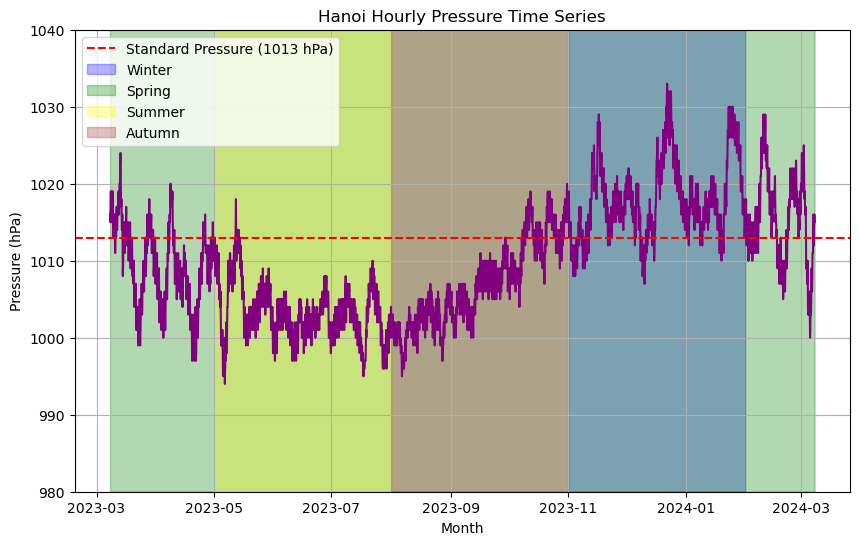

In [11]:
# Define seasons (assuming meteorological seasons: winter, spring, summer, autumn)
winter_months = [11, 12, 1]
spring_months = [2, 3, 4]
summer_months = [5, 6, 7]
autumn_months = [8, 9, 10]

# Plot pressure variable as a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df.index, df['Pressure'], color='purple')  # Line plot

# Add a horizontal line at 1013 hPa with a label
plt.axhline(y=1013, color='red', linestyle='--', label='Standard Pressure (1013 hPa)')

# Shade winter season
plt.fill_between(df.index[df.index.month.isin(winter_months)], 980, 1040, color='blue', alpha=0.3, label='Winter')

# Shade spring season
plt.fill_between(df.index[df.index.month.isin(spring_months)], 980, 1040, color='green', alpha=0.3, label='Spring')

# Shade summer season
plt.fill_between(df.index[df.index.month.isin(summer_months)], 980, 1040, color='yellow', alpha=0.3, label='Summer')

# Shade autumn season
plt.fill_between(df.index[df.index.month.isin(autumn_months)], 980, 1040, color='brown', alpha=0.3, label='Autumn')

plt.title('Hanoi Hourly Pressure Time Series')  # Set the title
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Pressure (hPa)')  # Set the y-axis label
plt.ylim(980, 1040)  # Set the y-axis limits
plt.grid(True)  # Add gridlines
plt.legend()  # Show legend
plt.show()  # Display the plot

### 3.5.2. Average Pressure per Season

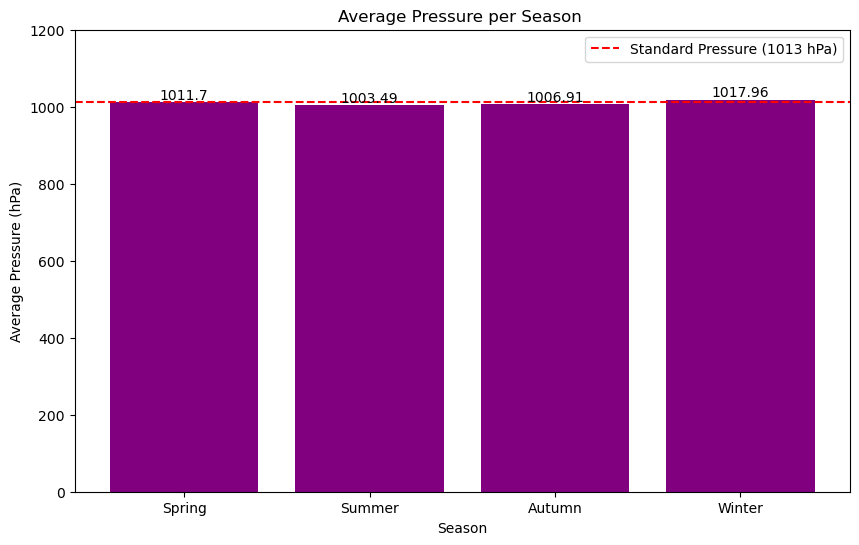

In [33]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average humidity for each season
seasonal_humid = {}
for season, months in seasons.items():
    seasonal_humid[season] = df.loc[df.index.month.isin(months), 'Pressure'].mean()

# Plot the average humidity for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_humid.keys(), seasonal_humid.values(), color='purple')
plt.axhline(y=1013, color='red', linestyle='--', label='Standard Pressure (1013 hPa)')
plt.title('Average Pressure per Season ')
plt.xlabel('Season')
plt.ylabel('Average Pressure (hPa)')
plt.ylim(0, 1200)  # Set the y-axis limits

# Annotate the bars with the average humidity values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')
plt.legend()  # Show legend
plt.show()

*In the depicted graphs above, Hanoi's pressure levels during summer and autumn notably fall below the standard level. According to [National Geographic](https://education.nationalgeographic.org/resource/atmospheric-pressure/), such deviations often accompany low-pressure systems, which typically herald cloudiness, increased wind, and precipitation. This phenomenon offers insight into high amount of precipitation observed during these seasons. Conversely, winter exhibits the highest atmospheric pressure levels, resulting in stagnant air. As explained by the [University Corporation for Atmospheric Research](https://scied.ucar.edu/learning-zone/air-quality/how-weather-affects-air-quality), this stagnant air can trap pollutants from vehicle and factory exhaust within the city atmosphere, leading to elevated PM2.5 levels during the season. Meanwhile, the pressure figures for spring fluctuate around the standard level, suggesting a relatively stable atmospheric condition during that time.*

## 3.6. Humidity

### 3.6.1. Hourly Humidity Time Series

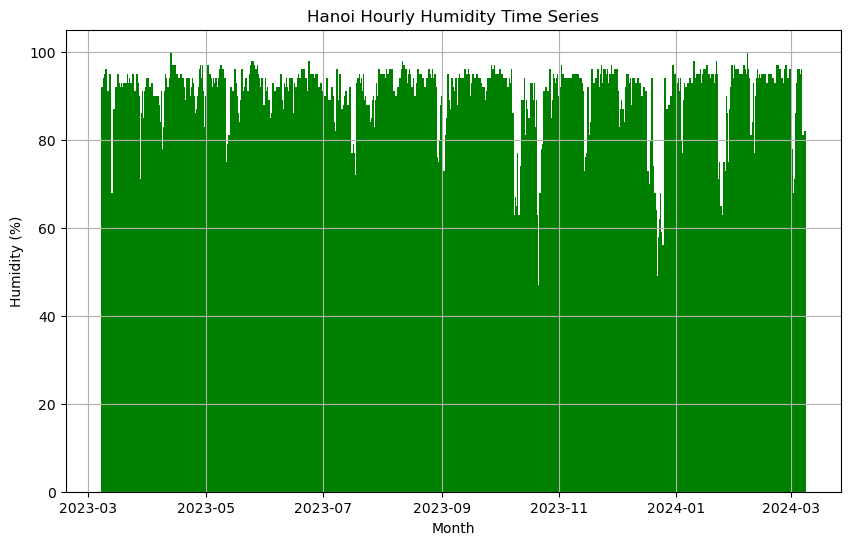

Average Annual Relative Humidity: 78.04 %


In [13]:
# Plot humidity variable
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(df.index, df['Relative Humidity'], color='green', linestyle='-')  # Line plot
plt.title('Hanoi Hourly Humidity Time Series')  # Set the title
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Humidity (%)')  # Set the y-axis label
plt.grid(True)  # Add gridlines
plt.show()  # Display the plot

# Calculate the average of the annual mean relative humidity values
average_annual_rh = df["Relative Humidity"].mean()

print("Average Annual Relative Humidity:", round(average_annual_rh, 2), '%')

### 3.6.2. Average Humidity per Season

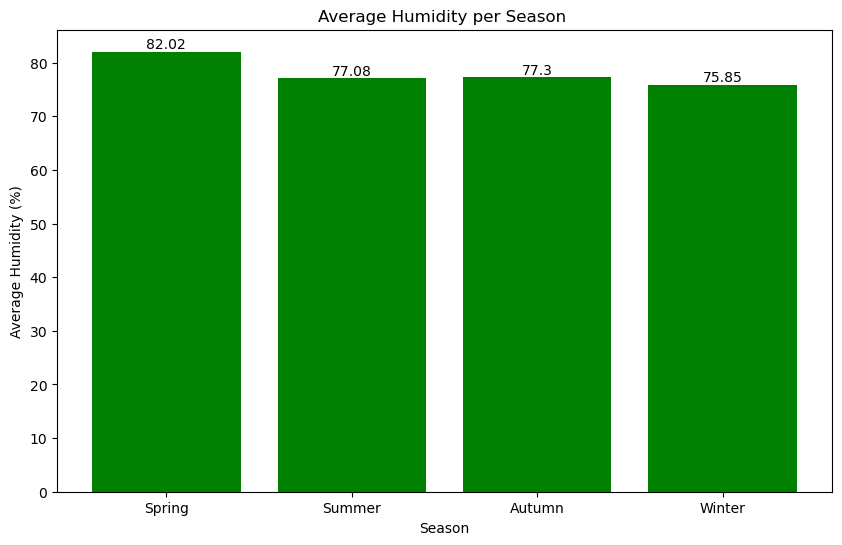

In [14]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average humidity for each season
seasonal_humid = {}
for season, months in seasons.items():
    seasonal_humid[season] = df.loc[df.index.month.isin(months), 'Relative Humidity'].mean()

# Plot the average humidity for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_humid.keys(), seasonal_humid.values(), color='green')
plt.title('Average Humidity per Season ')
plt.xlabel('Season')
plt.ylabel('Average Humidity (%)')

# Annotate the bars with the average humidity values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()

*Hanoi maintains a mean humidity of 78.05%, placing it among the most humid cities in Asia. The peak of humidity occurs during spring, coinciding with frequent drizzles while the other seasons have approximately same levels of humidity.* 

*In ["People who 'farewell' Hanoi because of the humidity"](https://www.vietnam.vn/en/nhung-nguoi-chia-tay-ha-noi-vi-nom-am/) as reported by VnExpress, the arrival of spring in Hanoi is marked by discomfort for its residents, often leading to illnesses and unpleasant living conditions. As temperatures rise along with the humidity, homes become literally sweaty and clothes remain damp, emitting an unpleasant odor. The article shares a poignant story of a Hanoian forced to leave her hometown due to the adverse effects of the city's air quality and harsh weather conditions. The struggles and health implications faced by her family, which resonate with my own experiences as I write this, are vividly depicted in the narrative. Please refer to the article to know more about her struggle.*

## 3.7. Temperature

### 3.7.1. Hourly Temperature Time Series

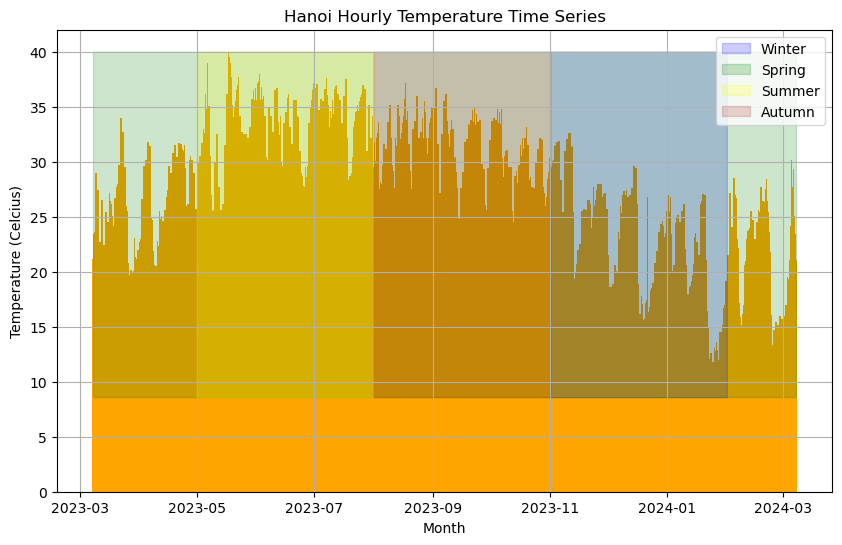

Average Annual Temperature: 25.28 ℃ 



In [15]:
# Define seasons (assuming meteorological seasons: winter, spring, summer, autumn)
winter_months = [11, 12, 1]
spring_months = [2, 3, 4]
summer_months = [5, 6, 7]
autumn_months = [8, 9, 10]

# Plot temperature variable
plt.figure(figsize=(10, 6))

# Plot entire temperature time series
plt.bar(df.index, df['Temperature'], color='orange', linestyle='-')

# Shade winter season
plt.fill_between(df.index[df.index.month.isin(winter_months)], df['Temperature'].min(), df['Temperature'].max(), color='blue', alpha=0.2, label='Winter')

# Shade spring season
plt.fill_between(df.index[df.index.month.isin(spring_months)], df['Temperature'].min(), df['Temperature'].max(), color='green', alpha=0.2, label='Spring')

# Shade summer season
plt.fill_between(df.index[df.index.month.isin(summer_months)], df['Temperature'].min(), df['Temperature'].max(), color='yellow', alpha=0.2, label='Summer')

# Shade autumn season
plt.fill_between(df.index[df.index.month.isin(autumn_months)], df['Temperature'].min(), df['Temperature'].max(), color='brown', alpha=0.2, label='Autumn')

# Set title and labels
plt.title('Hanoi Hourly Temperature Time Series')
plt.xlabel('Month')
plt.ylabel('Temperature (Celcius)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

average_annual_temperature = df['Temperature'].mean()

# Print the average annual temperature
print("Average Annual Temperature:", round(average_annual_temperature, 2), "℃ \n")

*According to the hourly temperature graph, we can see there are lots of peaks, indicating that temperatures typically peak during midday before gradually declining towards midnight everyday.*

### 3.7.2. Average Temperature per Season

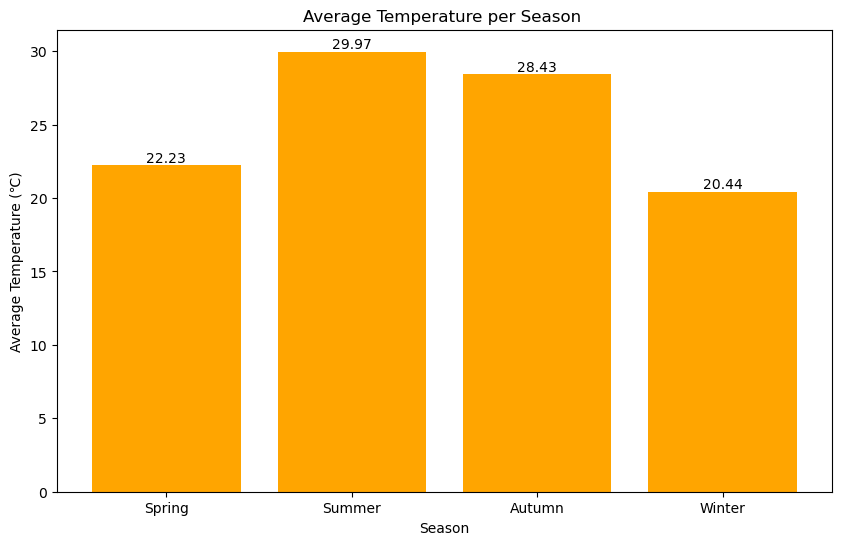

In [16]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average temperature for each season
seasonal_temp = {}
for season, months in seasons.items():
    seasonal_temp[season] = df.loc[df.index.month.isin(months), 'Temperature'].mean()

# Plot the average temperature for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_temp.keys(), seasonal_temp.values(), color='orange')
plt.title('Average Temperature per Season ')
plt.xlabel('Season')
plt.ylabel('Average Temperature (℃)')

# Annotate the bars with the average temperature values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()

*It's worth noting that the average temperature during summer and autumn consistently exceeds 28℃, signaling exceptionally hot weather during these seasons. In contrast, the average temperatures during spring and winter exhibit a slight variance of only 1.79℃.*

## 3.8. Wind Speed

### 3.8.1. Hourly Wind Speed Time Series

C:\Users\nguye\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


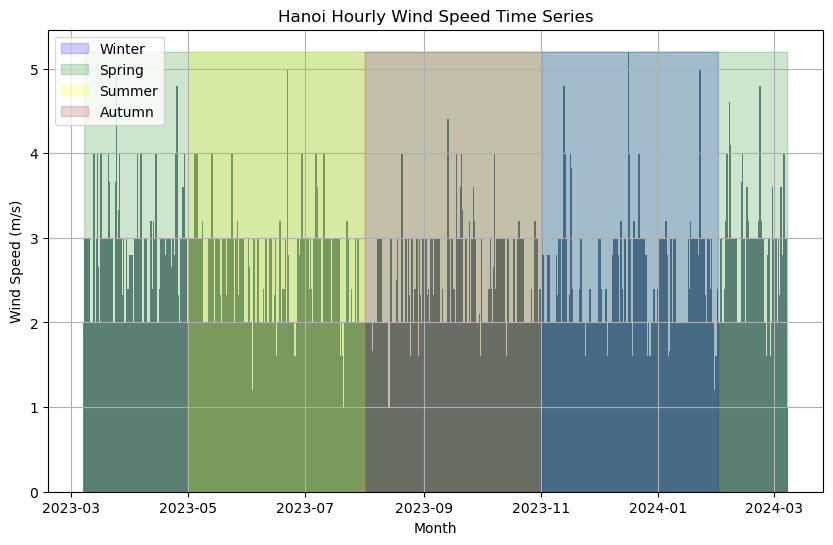

Average Annual Wind Speed: 1.61 m/s



In [17]:
# Define seasons (assuming meteorological seasons: winter, spring, summer, autumn)
winter_months = [11, 12, 1]
spring_months = [2, 3, 4]
summer_months = [5, 6, 7]
autumn_months = [8, 9, 10]

# Plot wind speed variable
plt.figure(figsize=(10, 6))

# Plot entire wind speed time series
plt.bar(df.index, df['Wind Speed'], color='slategray', linestyle='-')

# Shade winter season
plt.fill_between(df.index[df.index.month.isin(winter_months)], df['Wind Speed'].min(), df['Wind Speed'].max(), color='blue', alpha=0.2, label='Winter')

# Shade spring season
plt.fill_between(df.index[df.index.month.isin(spring_months)], df['Wind Speed'].min(), df['Wind Speed'].max(), color='green', alpha=0.2, label='Spring')

# Shade summer season
plt.fill_between(df.index[df.index.month.isin(summer_months)], df['Wind Speed'].min(), df['Wind Speed'].max(), color='yellow', alpha=0.2, label='Summer')

# Shade autumn season
plt.fill_between(df.index[df.index.month.isin(autumn_months)], df['Wind Speed'].min(), df['Wind Speed'].max(), color='brown', alpha=0.2, label='Autumn')

# Set title and labels
plt.title('Hanoi Hourly Wind Speed Time Series')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')

# Add legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Calculate the average annual wind speed
average_annual_wind_speed = df['Wind Speed'].mean()

# Print the average annual wind speed
print("Average Annual Wind Speed:", round(average_annual_wind_speed, 2), "m/s\n")

### 3.8.2. Average Wind Speed per Season

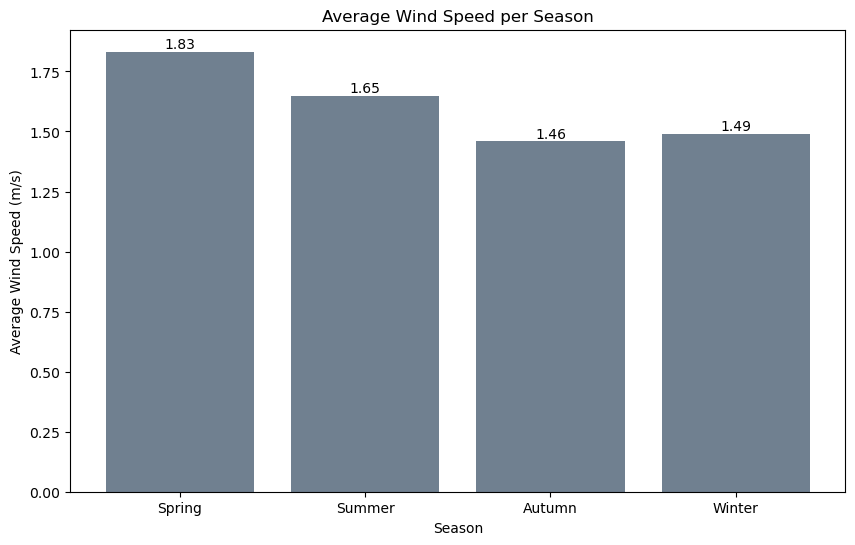

In [18]:
# Define seasons
seasons = {
    'Spring': [2, 3, 4],
    'Summer': [5, 6, 7],
    'Autumn': [8, 9, 10],
    'Winter': [11, 12, 1]
}

# Group data by season and calculate average wind speed for each season
seasonal_wind_speed = {}
for season, months in seasons.items():
    seasonal_wind_speed[season] = df.loc[df.index.month.isin(months), 'Wind Speed'].mean()

# Plot the average wind speed for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_wind_speed.keys(), seasonal_wind_speed.values(), color='slategray')
plt.title('Average Wind Speed per Season')
plt.xlabel('Season')
plt.ylabel('Average Wind Speed (m/s)')

# Annotate the bars with the average wind speed values for each season
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
             ha='center', va='bottom')

plt.show()


*In general, Hanoi experiences relatively low wind speeds, with an average annual wind speed of 1.61 m/s. During the past year, spring recorded the highest average wind speed, likely influenced by the [Northeast monsoons](https://www.vietnamdrive.com/monsoon-seasons/). The summer season followed with the second highest average wind speed, possibly attributed to frequent rain showers. Interestingly, autumn and winter exhibited similar levels of wind speed*

# IV. The Effect of Weather Conditions on Air Quality

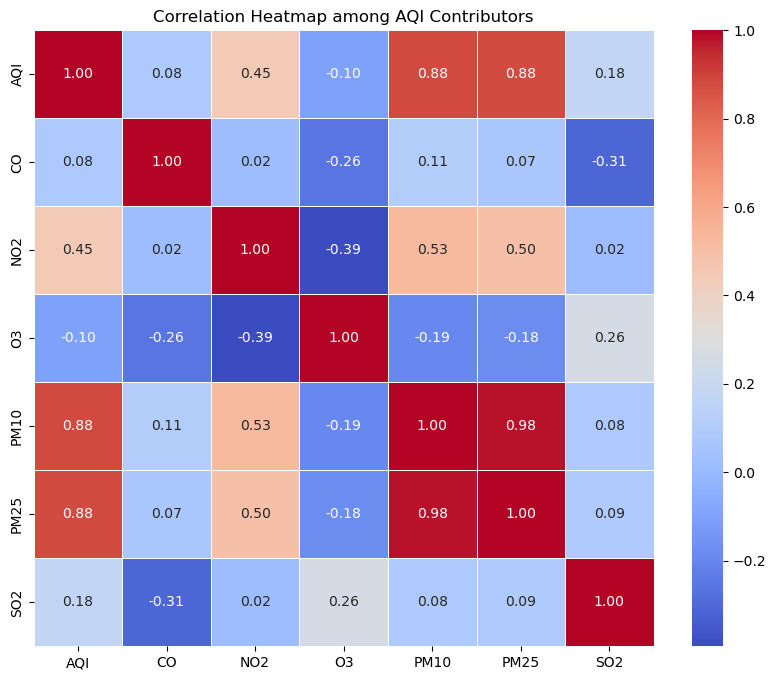

In [19]:
# Select the relevant columns
corr_columns = ['AQI', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2']

# Calculate the correlation matrix
correlation_matrix = df[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap among AQI Contributors')
plt.show()

*According to the correlation heatmap, PM2.5 and PM10 show high correlation with AQI. This fact suggests that PM2.5 and PM10 are significant contributors to AQI. Furthermore, according to [VnExpress](https://e.vnexpress.net/news/environment/hanoi-s-air-quality-dropping-over-large-scales-4719205.html), it is indicated that the air pollution in Hanoi mainly came from PM2.5 dusts. Hence, I will choose PM2.5 as the variable measuring air quality*

*For the weather condition, I will choose precipitation, humidity, temperature, and wind speed as the weather condition variables*

## 4.1. Does Precipitation Affect Air Quality?

To thoroughly assess the impact of precipitation on air quality, I'll delve into how both the duration and amount of precipitation affect PM2.5 levels.

Initially, I'll quantify the cumulative hours of rainfall and record them in a new column named 'Accumulated Hours of Rain'. This column will capture the continuous count of hours with non-zero precipitation, resetting to zero whenever rainfall ceases.

### 4.1.1. Calculate the Cumulated Hours of Rain

In [20]:
# Initialize a variable to store the accumulated hours of rain
accumulated_hours_of_rain = 0

# Create an empty list to store the accumulated hours for each row
accumulated_hours_list = []

# Iterate through each row in the DataFrame
for precipitation in df['Precipitation']:
    # If it's raining in the current hour
    if precipitation > 0:
        # Increment the accumulated hours
        accumulated_hours_of_rain += 1
    else:
        # If it's not raining, reset the accumulated hours to zero
        accumulated_hours_of_rain = 0
    
    # Append the accumulated hours to the list
    accumulated_hours_list.append(accumulated_hours_of_rain)

# Add the list as a new column in the DataFrame
df['Accumulated Hours of Rain'] = accumulated_hours_list

df.head()

,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed,Accumulated Hours of Rain
Local Time,,,,,,,,,,,,,,,,,,,
2023-03-08 00:00:00,2023-03-07T17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,131,170.6,29.3,53.3,58.8,47.0,67.3,91,0.0,1016,86,21.2,0.0,2.00,0
2023-03-08 01:00:00,2023-03-07T18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,158.7,25.0,54.0,56.3,45.0,65.0,100,0.0,1016,89,21.1,0.0,2.00,0
2023-03-08 02:00:00,2023-03-07T19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,150.2,21.7,55.0,52.5,42.0,65.7,100,0.0,1016,90,20.9,0.0,1.66,0
2023-03-08 03:00:00,2023-03-07T20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,126,141.6,18.3,56.0,56.3,45.0,66.3,100,0.0,1016,91,20.7,0.0,1.33,0
2023-03-08 04:00:00,2023-03-07T21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,133.1,15.0,57.0,52.5,42.0,67.0,100,0.0,1015,92,20.5,0.0,1.00,0


In [21]:
#Check summary statistics of 'Accumulated Hours of Rain' column
print(df['Accumulated Hours of Rain'].describe())

count    8785.000000
mean        1.534092
std         5.691664
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        67.000000
Name: Accumulated Hours of Rain, dtype: float64


*Upon reviewing the summary statistics of the 'Accumulated Hours of Rain' column, it's evident that there were approximately 67 hours, equivalent to nearly three days, of uninterrupted rainfall. Such prolonged precipitation over such a short span of time signifies a significant amount of rainfall during those days.*

### 4.1.2. Relationship Between Precipitation Hours and PM2.5 Level 

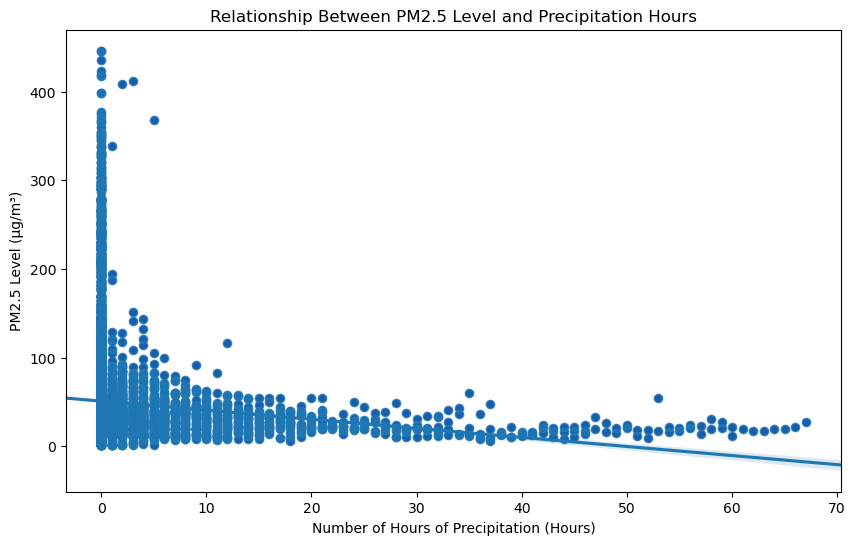

Correlation Coefficient: -0.12


In [22]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Accumulated Hours of Rain', y='PM25', color='darkblue')

# Draw regression line in red
sns.regplot(data=df, x='Accumulated Hours of Rain', y='PM25', truncate=False)

# Calculate correlation
correlation_coefficient = df['Accumulated Hours of Rain'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Precipitation Hours')
plt.xlabel('Number of Hours of Precipitation (Hours)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")


**Observation:** *The visual representation illustrates a negative correlation coefficient of -0.12, suggesting a very low correlation, which may be considered insignificant. However, upon closer examination for trends and patterns, it becomes apparent that the more hours it rains, the less Pm2.5 pollutant it is. Thus, it can be inferred that as the duration of rainfall increases, the PM2.5 level tends to decrease.*

### 4.1.3. Relationship Between Precipitation Amount and PM2.5 Level 

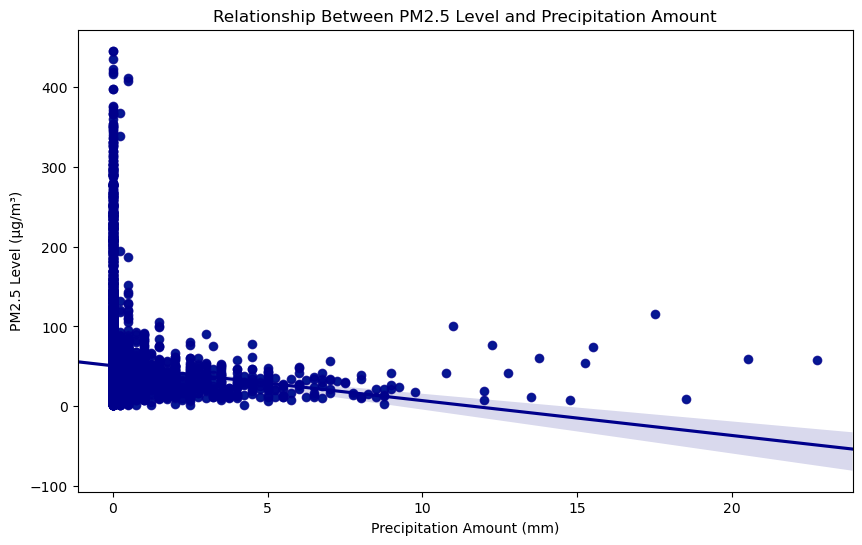

Correlation Coefficient: -0.09


In [23]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Precipitation', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Precipitation', y='PM25', truncate= False, color='darkblue')

# Calculate correlation
correlation_coefficient = df['Precipitation'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Precipitation Amount')
plt.xlabel('Precipitation Amount (mm)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")


**Observation:** *The correlation between precipitation amount and PM2.5 is almost 0, this means that there is no linear relationship between the two variables. On looking for patterns, it is observed that for high amount of precipitation hours, there seem to be low level of PM2.5. It is safe to say that the more heavy it rains, the lower the PM2.5 level is.*

## 4.2. Does Pressure Affect Air Quality?

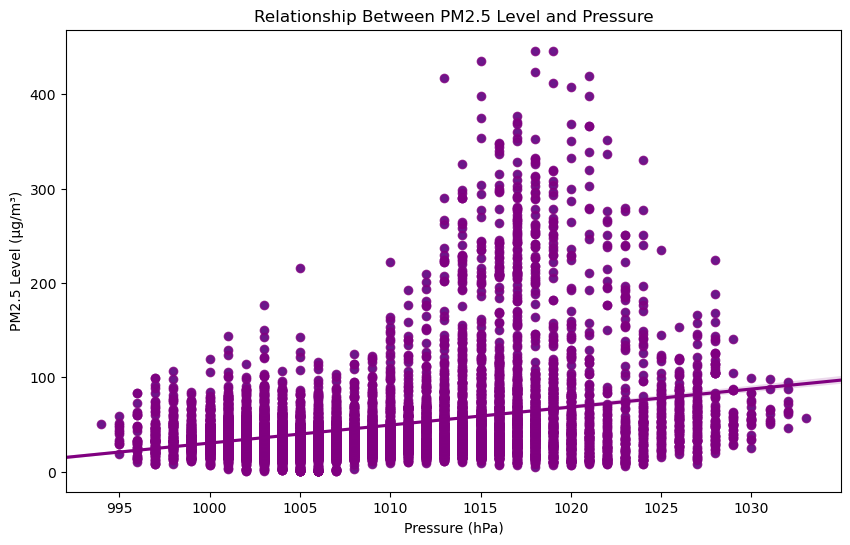

Correlation Coefficient: 0.30


In [24]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Pressure', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Pressure', y='PM25', truncate= False, color='purple')

# Calculate correlation
correlation_coefficient = df['Pressure'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Pressure')
plt.xlabel('Pressure (hPa)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

**Observation:** *The correlation coefficient between atmospheric pressure and Pm2.5 level shows a figure of 0.3, indicating a moderate correlation. It becomes clear that the higher the pressure, the higher the Pm2.5 level. As explained by the [University Corporation for Atmospheric Research](https://scied.ucar.edu/learning-zone/air-quality/how-weather-affects-air-quality), low-pressure systems bring wet and windy conditions. A passing rain can wash pollutants out of the atmosphere or transport them to a new area, producing clear skies. In the contrary, high-pressure systems can lead to stagnant air, where pollutants such as vehicle and factory exhaust become concentrated as the air stops moving.*

## 4.3. Does Humidity Affect Air Quality?

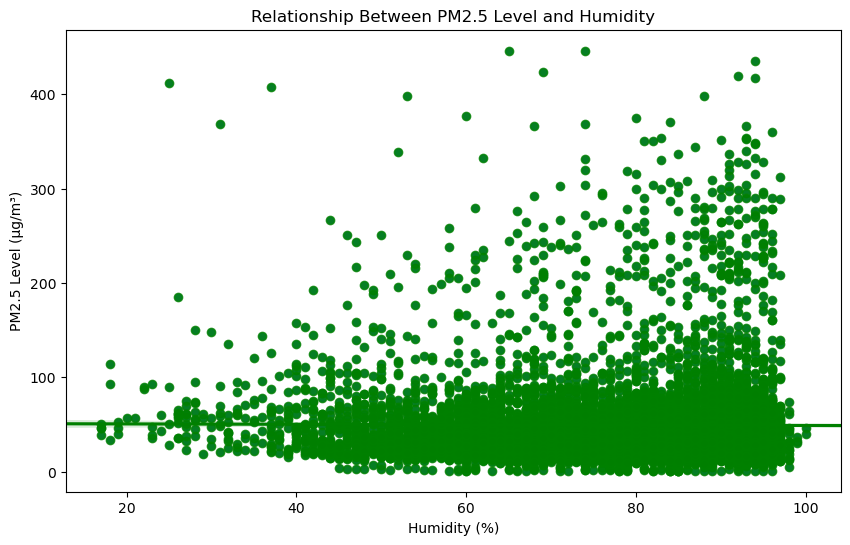

Correlation Coefficient: -0.01


In [25]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Relative Humidity', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Relative Humidity', y='PM25', truncate= False, color='green')

# Calculate correlation
correlation_coefficient = df['Relative Humidity'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

**Observation:** *The correlation between humidity and the PM2.5 Level is almost zero, indicating no significant relationship. Upon examining the scatter plot, no clear pattern emerges, suggesting that humidity may not be a significant factor influencing PM2.5 levels.*

## 4.4. Does Temperature Affect Air Quality?

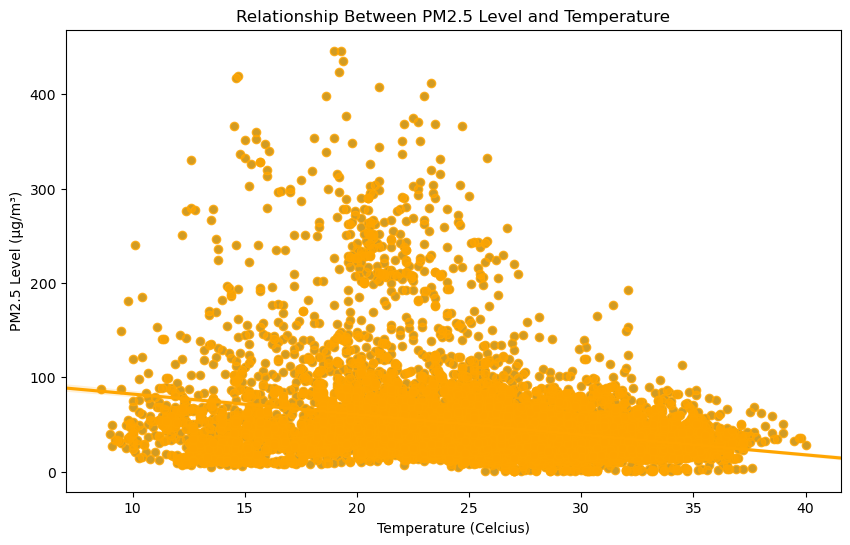

Correlation Coefficient: -0.25


In [26]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Temperature', y='PM25', truncate= False, color='orange')

# Calculate correlation
correlation_coefficient = df['Temperature'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Temperature')
plt.xlabel('Temperature (Celcius)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

**Observation:** *The graph depicted a negative correlation coefficient of -0.25, suggesting a low correlation between temperature and Pm2.5 index. However, upon closer examination for trends and patterns, the colder the temperature is, the higher the Pm2.5 level is.*

*[University Corporation for Atmospheric Research](https://scied.ucar.edu/learning-zone/air-quality/how-weather-affects-air-quality) explained that during the winter the layer of warm air acts like a lid, keeping cold air at the surface. This creates a thermal inversion, which forms when a layer of warm air above traps cool air and pollution close to the ground. The illustration below accurately portrays the geographical features of Hanoi, which are characterized by surrounding mountains. This natural landscape impedes the dispersion of air pollution, contributing to its accumulation in the city.*
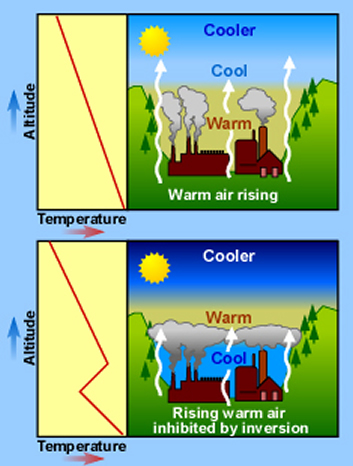

*Source: United States Environmental Protection Agency*

## 4.5. Does Wind Speed Affect Air Quality?

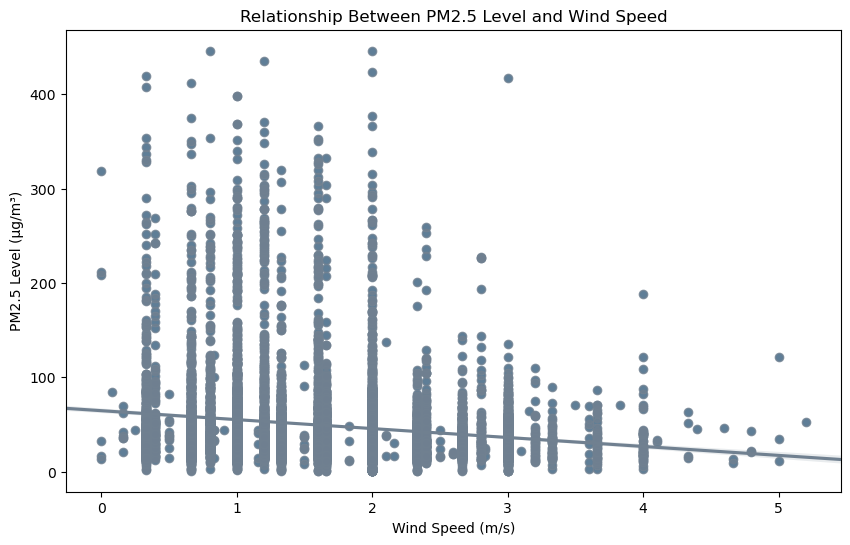

Correlation Coefficient: -0.16


In [27]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wind Speed', y='PM25')

# Draw regression line
sns.regplot(data=df, x='Wind Speed', y='PM25', truncate= False, color='slategray')

# Calculate correlation
correlation_coefficient = df['Wind Speed'].corr(df['PM25'])

# Add title and labels
plt.title('Relationship Between PM2.5 Level and Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 Level (μg/m³)')

plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

**Observation:** *The graph showed a negative correlation coefficient of -0.16, suggesting a very low correlation, which may be considered insignificant. However, upon closer examination for trends and patterns, it illustrates that the more windy it is, the less Pm2.5 pollutant it is.*

*Explained by [IQAir](https://www.iqair.com/newsroom/wind-weather-air-pollution), when pollutants accumulate in an area, wind can play a crucial role in dispersing them, potentially reducing their concentration in that specific region. This process can also carry pollutants away from their original source, mitigating their impact over a larger area.*

# Conclusion

## Insights

**Hanoi's Weather:**
- ***Precipitation***: Hanoi experienced considerable rainfall in the past year, totaling 2408.25 mm. Summer and autumn received the most substantial rainfall, with autumn being the rainiest season overall. Conversely, spring witnessed frequent drizzles, whereas winter was recorded as the dryest season.
- ***Pressure***: Hanoi has low pressure in summer and autumn when the precipitation amount is high
- ***Humidity***: With a mean humidity of 78.05%, Hanoi ranks among the most humid cities in Asia. Spring saw the highest humidity among 4 seasons, coinciding with frequent drizzles.
- ***Temperature***: The average temperature of 25.3℃ suggests that the city experiences consistently warm conditions throughout the year. The hottest season is summer, with average temperature exceeding 28℃
- ***Wind speed***: Hanoi experiences relatively low wind speeds in the past year. Spring recorded the highest average wind speed, likely influenced by the Northeast monsoons

**Hanoi's Air Quality:**
- ***AQI***: On average, Hanoi registers an AQI level of 117.63, placing it within the "Unhealthy for Sensitive Groups" category. The figure was in Hazardous level (>300) at different timestamps from November to mid February. On explaining this occasion, Vietnam Pollution Control Department noted that dry weather conditions in Hanoi led to widespread dust dispersion. Additionally, the burning of trash and leftover agricultural products was identified as contributing to increased pollution levels..
- ***PM2.5***: The peak PM2.5 levels were observed at 8 AM, 9 AM, 7 PM, 8 PM, and 9 PM throughout the year. The season with highest average PM2.5 concentration is winter, followed by spring, autumn, summer
- PM2.5 and PM10 show high correlation with AQI, which suggests that PM2.5 and PM10 are significant contributors to AQI.

**The Effect of Weather Conditions on Air Quality in Hanoi:**
- The more hours it rains, the lower the Pm2.5 level is
- The more heavily it rains, the lower the Pm2.5 level is
- The higher the atmospheric pressure, the higher the Pm2.5 level
- Humidity shows no relationship with Pm2.5 level 
- The colder the temperature is, the higher the the Pm2.5 level is
- The more windy it is, the lower the Pm2.5 level is

## Air Quality Advisory

*According to [New York State Deparment of Health](https://www.health.ny.gov/environmental/indoors/air/pmq_a.htm#:~:text=Spend%20more%20time%20indoors.,air%20conditioning%20if%20you%20can.), if PM2.5 is at unhealthy levels, several steps can be taken:*

**If you are outdoor:**

*- **Wear masks:** If going outdoors is unavoidable, consider wearing N95 or similar masks designed to filter out particulate matter from the air.*

*- **Limit exertion:** Avoid strenuous activities like running or cycling. Breathe shallowly if possible, as deep breaths bring in more polluted air.*

*- **Carpool:** Utilize personal vehicle sits to reduce PM2.5 in traffic.*

**If you are indoor:**

*- **Close windows and doors:** Windows and doors should be closed to prevent polluted air from outdoor entering.*

*- **Use an air purifier:** Consider using an air purifier in your home with a HEPA filter, which can effectively remove PM2.5 particles from the air.*